
Facial Recognition using PyTorch and OpenCV

https://ritik12.medium.com/facial-recognition-using-pytorch-and-opencv-467c4e41d1f


Machine Learning - Face Recognition CNN Pytorch.ipynb
https://github.com/rubencg195/Pytorch-Tutorials/blob/master/Machine%20Learning%20-%20Face%20Recognition%20CNN%20Pytorch.ipynb



Face Recognition Using Pytorch
https://github.com/timesler/facenet-pytorch

Face Landmarks Detection With PyTorch

https://towardsdatascience.com/face-landmarks-detection-with-pytorch-4b4852f5e9c4



다중입력 deep neural network
https://rosenfelder.ai/multi-input-neural-network-pytorch/



Understanding dimensions in PyTorch
https://towardsdatascience.com/understanding-dimensions-in-pytorch-6edf9972d3be

학습하기 
https://github.com/deeplearningzerotoall/PyTorch

In [1]:
from torch.optim import lr_scheduler
from torch.nn.init import *
from torchvision import transforms, utils, datasets, models
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import ToTensor
from FaceFeatureDataset import FaceFeatureDataset
import dlib_index

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cuda device


In [2]:
batch_size = 30
epochs = 1000

Shape of X [N, F, C]: torch.Size([30, 2, 68])
Shape of Tensor y: torch.Size([30, 33]) torch.float32


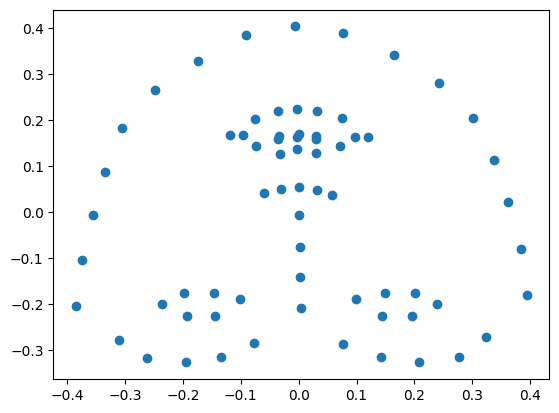

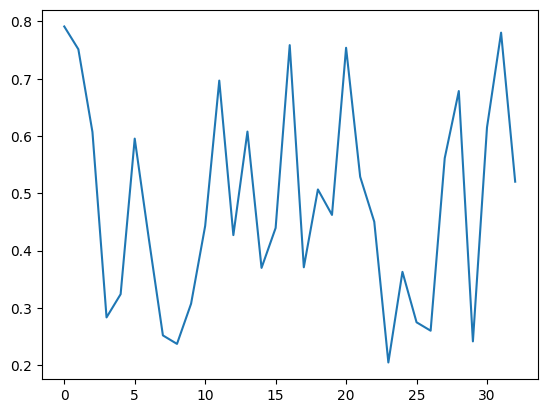

In [3]:
# Create DataLoader
training_data = FaceFeatureDataset(
    feature_file="./outimg/Train/facefeature.csv", label_file="./Dataset/Train/csv/train.csv")
test_data = FaceFeatureDataset(
    feature_file="./outimg/Test/facefeature.csv", label_file="./Dataset/Test/csv/test.csv")

train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# 데이터 로드 확인
for X, y in test_loader:
    # N , Channel, H= width W = height
    print(f"Shape of X [N, F, C]: {X.shape}")
    print(f"Shape of Tensor y: {y.shape} {y.dtype}")
    break

n_total_steps = len(test_loader)

plt.scatter(X[0][0], X[0][1])
plt.show()

plt.plot(y[0])
plt.show()

# print(f'Traing dat length {n_total_steps}')
# print(y)


In [4]:

num_classes = 33

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(68 * 2, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 64),
            nn.LeakyReLU(),
            nn.Linear(64, num_classes),                        
        )
    

    def forward(self, x):
        # 배치 차원을 제외한 모든 차원을 하나로 평탄화(flatten)
        x = torch.flatten(x, 1)        
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)


NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=136, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Linear(in_features=64, out_features=33, bias=True)
  )
)


In [5]:
criterion = nn.MSELoss(reduction='sum').to(device)

#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
def train(dataloader : DataLoader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X)        
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        
        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [7]:
# Training
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, criterion, optimizer)    
print("Done!")

Epoch 1
-------------------------------


AttributeError: 'NeuralNetwork' object has no attribute 'flatten'

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear_relu_stack.0.weight tensor([[ 0.0806,  0.0878,  0.0609,  ..., -0.0306, -0.0616, -0.0913],
        [ 0.0553,  0.1125, -0.0255,  ...,  0.0227, -0.0733,  0.0285],
        [ 0.0803, -0.0585,  0.0276,  ...,  0.1427,  0.0753,  0.1058],
        ...,
        [-0.0389,  0.0160,  0.0867,  ...,  0.0267, -0.0339,  0.0092],
        [ 0.0296,  0.0227,  0.0967,  ...,  0.0501, -0.0887, -0.0331],
        [ 0.0331, -0.0588,  0.0572,  ...,  0.0370,  0.0627,  0.0341]],
       device='cuda:0')
linear_relu_stack.0.bias tensor([ 0.0416,  0.0369, -0.0976, -0.0291,  0.0754, -0.0872, -0.0519, -0.0676,
         0.0279,  0.1140,  0.0838,  0.0051, -0.0578, -0.0874, -0.0294,  0.0702,
        -0.0026, -0.0213, -0.1056,  0.0201,  0.0602,  0.0889, -0.0123, -0.0426,
         0.0593,  0.0085, -0.0189, -0.0214,  0.0940,  0.0733,  0.0884, -0.0237,
         0.0034, -0.0355,  0.0880,  0.0998, -0.0631,  0.0071, -0.0559,  0.0464,
        -0.0072, -0.0707, -0.0893,  0.0589,  0.0754,  0.0443, -0.0113, -0.0527,
        -0

In [ ]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
def test(dataloader : DataLoader, model, loss_fn):
    size = len(dataloader.dataset)
    print('test size', size, 'batch size :', dataloader.batch_size)
    # num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloader:            
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)            
            #print('pred =', pred)
            #print('loss', loss)
            #print('real', y)
        print('pred :', pred[0])
        print('real :', y[0])


In [ ]:

test(test_loader, model, criterion)

print("Done !")

test size 100 batch size : 30
pred : tensor([0.6503, 0.4493, 0.3857, 0.5296, 0.5800, 0.6256, 0.5670, 0.4231, 0.3837,
        0.2785, 0.6445, 0.4188, 0.5458, 0.3594, 0.5045, 0.3353, 0.5630, 0.5563,
        0.5578, 0.7240, 0.6148, 0.5697, 0.3146, 0.5982, 0.6693, 0.5251, 0.5520,
        0.4142, 0.6029, 0.5841, 0.3483, 0.5857, 0.3247], device='cuda:0')
real : tensor([0.5443, 0.6617, 0.3433, 0.3282, 0.5710, 0.3587, 0.2824, 0.6020, 0.3589,
        0.5217, 0.5342, 0.4075, 0.5104, 0.4524, 0.2554, 0.6097, 0.7619, 0.4054,
        0.5712, 0.7425, 0.3372, 0.2125, 0.5214, 0.2131, 0.6711, 0.2132, 0.7441,
        0.3801, 0.2628, 0.7938, 0.2873, 0.5116, 0.7034], device='cuda:0')
Done !
